In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import json
import pandas as pd

# Import the utility functions we created
from utils.data_utils import get_image_ids
from utils.mask_utils import generate_mask_from_json, DAMAGE_TO_INT_MAP

# --- Configuration ---
# IMPORTANT: Update this to the root directory of your xBD dataset
DATA_DIR = "E:/DATASETS/xBD/train" 
IMAGES_DIR = os.path.join(DATA_DIR, "images")
LABELS_DIR = os.path.join(DATA_DIR, "labels")

# --- Helper for Visualization ---
# Create a reverse map from integer to damage string for plotting
INT_TO_DAMAGE_MAP = {v: k for k, v in DAMAGE_TO_INT_MAP.items()}

In [2]:
# Use our utility to scan the directory and get all unique image IDs
all_image_ids = get_image_ids(IMAGES_DIR)
print(f"Found {len(all_image_ids)} unique image IDs in the dataset.")

Found 2799 unique image IDs in the dataset.


In [3]:
def visualize_sample(image_id):
    """
    Loads and displays a pre-disaster image, post-disaster image, and its
    generated ground-truth mask side-by-side.
    """
    try:
        # Load images
        pre_image_path = os.path.join(IMAGES_DIR, f"{image_id}_pre_disaster.png")
        post_image_path = os.path.join(IMAGES_DIR, f"{image_id}_post_disaster.png")
        pre_image = Image.open(pre_image_path)
        post_image = Image.open(post_image_path)

        # Generate mask
        json_path = os.path.join(LABELS_DIR, f"{image_id}_post_disaster.json")
        mask = generate_mask_from_json(json_path)
        
        # Get unique values for title
        unique_vals = np.unique(mask)
        damage_types = [INT_TO_DAMAGE_MAP.get(val, "background") for val in unique_vals]

        # Plotting
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        axes[0].imshow(pre_image)
        axes[0].set_title(f"{image_id}\nPre-Disaster")
        axes[0].axis('off')
        
        axes[1].imshow(post_image)
        axes[1].set_title("Post-Disaster")
        axes[1].axis('off')

        im = axes[2].imshow(mask, cmap='viridis') # Use a colormap to see the labels
        axes[2].set_title(f"Generated Mask\nDamage: {damage_types}")
        axes[2].axis('off')
        
        # Add a color bar
        cbar = fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)
        cbar.set_ticks(list(DAMAGE_TO_INT_MAP.values()))
        cbar.set_ticklabels(list(DAMAGE_TO_INT_MAP.keys()))
        
        plt.tight_layout()
        plt.show()

    except FileNotFoundError as e:
        print(f"Error loading files for ID {image_id}: {e}")

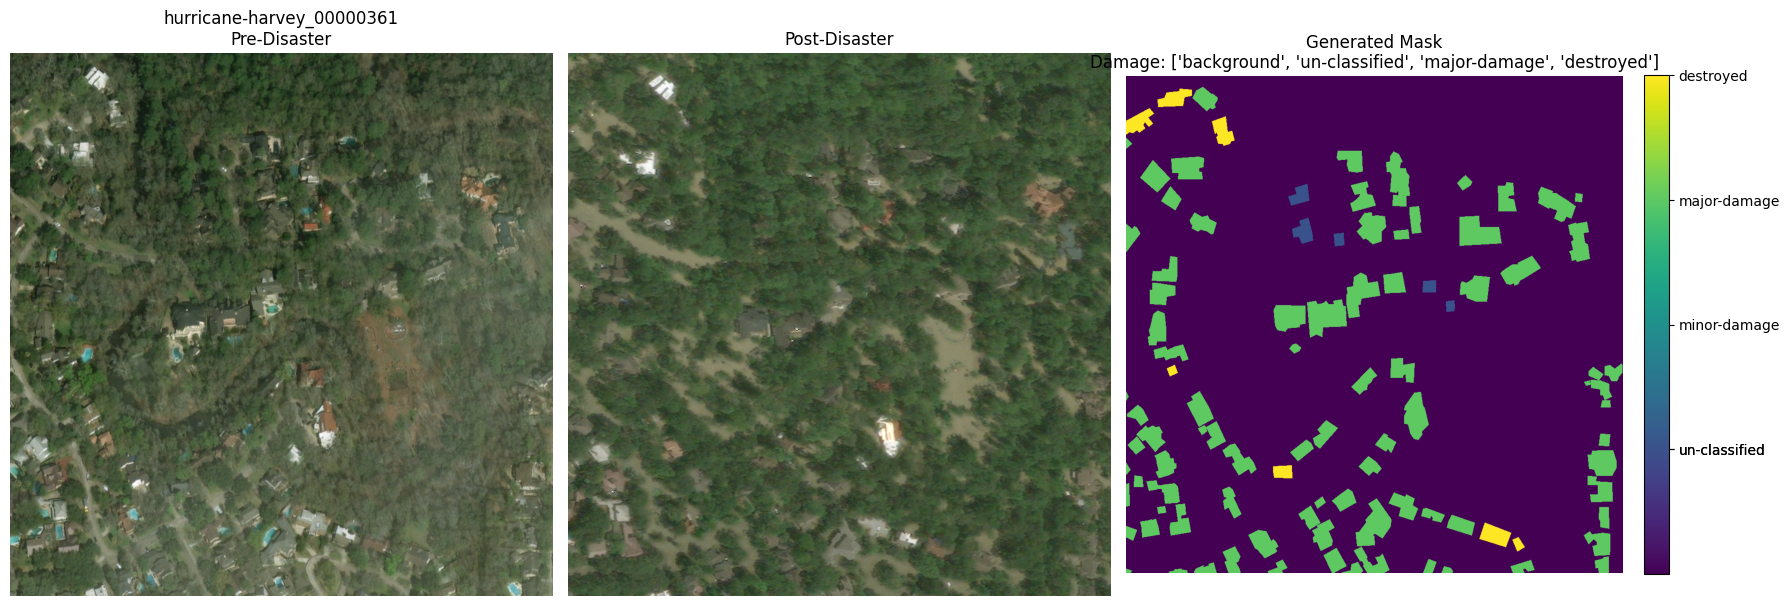

In [12]:
# Get a random image ID from our list
random_id = random.choice(all_image_ids)

# Visualize it!
visualize_sample(random_id)

# You can run this cell multiple times to see different random samples.
# If you want to see a specific image that had damage, you can find one
# during the statistics step below and paste its ID here.